# ISIC2019

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

# Define the path to your dataset
train_dir = '/kaggle/input/isic2019-128x128-jpeg/ISIC2019 128x128 jpeg/train'  # Replace with the actual path
label_file = '/kaggle/input/isic2019-128x128-jpeg/ISIC2019 128x128 jpeg/train.csv'  # Replace with the actual path

# Load the CSV file with labels
df = pd.read_csv(label_file)

# Ensure image filenames are correct
df['image'] = df['image'].str.strip()  # Remove any leading/trailing spaces
df['image'] = df['image'].apply(lambda x: x + '.jpg' if not x.endswith('.jpg') else x)  # Ensure .jpg extension

In [2]:
# Check if files exist and filter valid filenames
valid_files = df['image'].apply(lambda x: os.path.isfile(os.path.join(train_dir, x)))
df = df[valid_files]

In [4]:
# Load the pre-trained MobileNetV2 model without the top layers
local_weights_path = '/kaggle/input/mobilenet/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
model = MobileNetV2(weights=local_weights_path, include_top=False, pooling='avg', input_shape=(224, 224, 3))

In [5]:
# Set up ImageDataGenerator to load images in batches
datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Create a generator for the images
image_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_dir,
    x_col='image',
    class_mode=None,  # No labels needed for generator
    target_size=(224, 224),
    batch_size=32,
    shuffle=False  # Important for keeping the order
)

Found 25331 validated image filenames.


In [7]:
# Function to extract features using the model
def extract_features_with_batches(generator, model):
    features = model.predict(generator, verbose=1)
    return features

In [8]:
# Extract features using the generator
features = extract_features_with_batches(image_generator, model)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


792/792 ━━━━━━━━━━━━━━━━━━━━ 502s 631ms/step


In [9]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [10]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, n_iter=3000)
features_tsne = tsne.fit_transform(features_scaled)

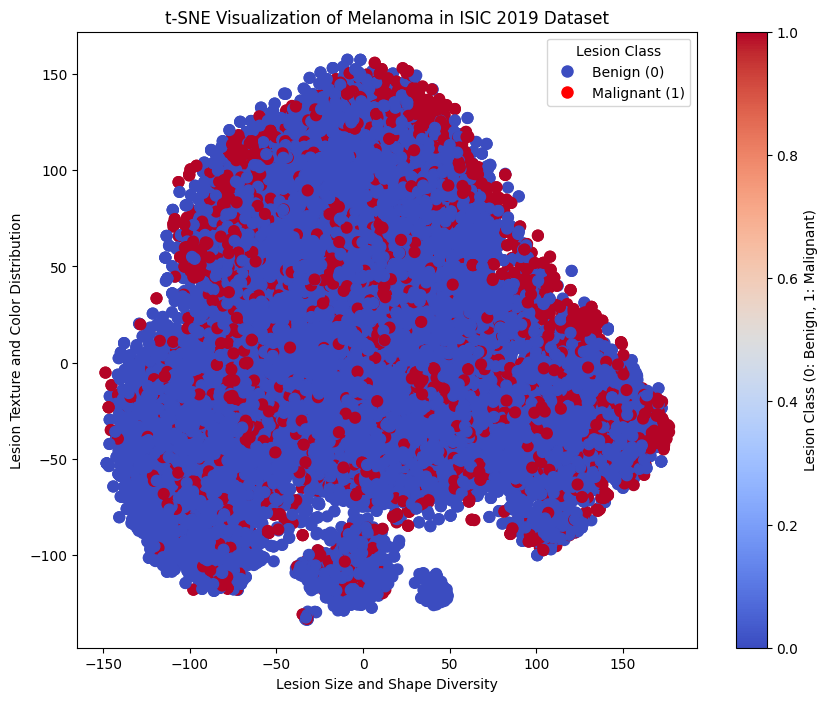

In [12]:
# Create a mapping for labels (assuming 'MEL' is a binary label)
labels = df['MEL'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with coolwarm colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='coolwarm', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
benign_color = plt.get_cmap('coolwarm')(0)  # Get the color for benign (0) from coolwarm
malignant_color = 'red'  # Set malignant (1) color to yellow

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Melanoma in ISIC 2019 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()


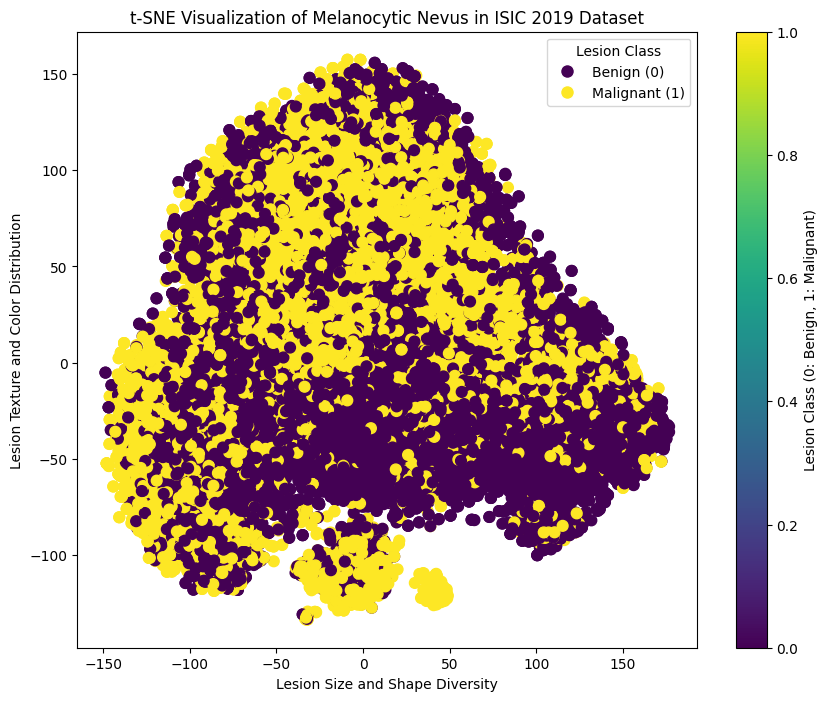

In [15]:
# Create a mapping for labels (assuming 'NV' is a binary label)
labels = df['NV'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with viridis colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
benign_color = plt.get_cmap('viridis')(0)  # Get the color for benign (0) from viridis
malignant_color = plt.get_cmap('viridis')(256)  # Get the color for malignant (1) from viridis

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Melanocytic Nevus in ISIC 2019 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()


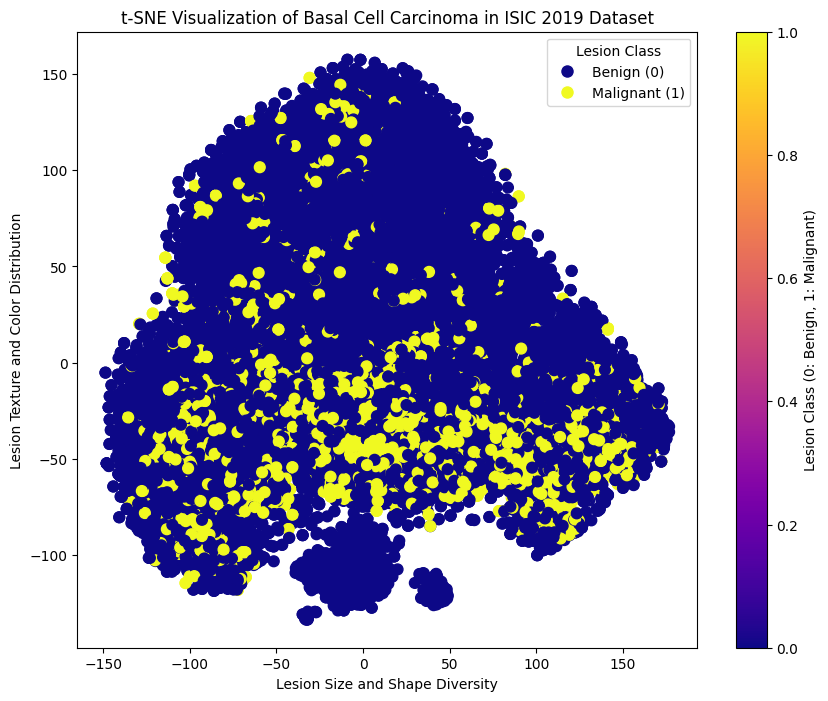

In [16]:
# Create a mapping for labels (assuming 'BCC' is a binary label)
labels = df['BCC'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with plasma colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='plasma', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
benign_color = plt.get_cmap('plasma')(0)  # Get the color for benign (0) from plasma
malignant_color = plt.get_cmap('plasma')(256)  # Get the color for malignant (1) from plasma

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Basal Cell Carcinoma in ISIC 2019 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()


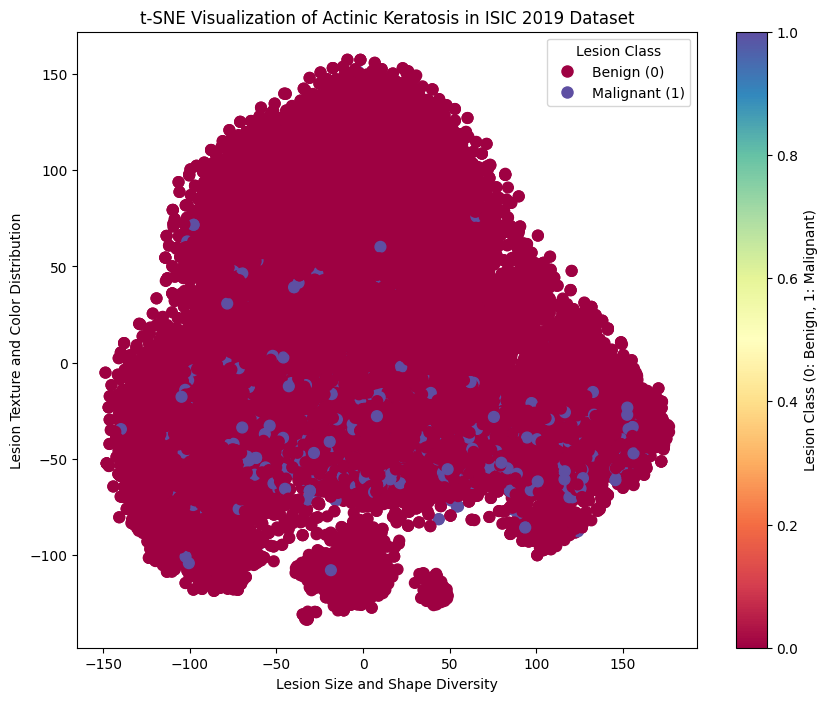

In [17]:
# Create a mapping for labels (assuming 'AK' is a binary label)
labels = df['AK'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with Spectral colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='Spectral', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
benign_color = plt.get_cmap('Spectral')(0)  # Get the color for benign (0) from Spectral
malignant_color = plt.get_cmap('Spectral')(256)  # Get the color for malignant (1) from Spectral

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Actinic Keratosis in ISIC 2019 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()

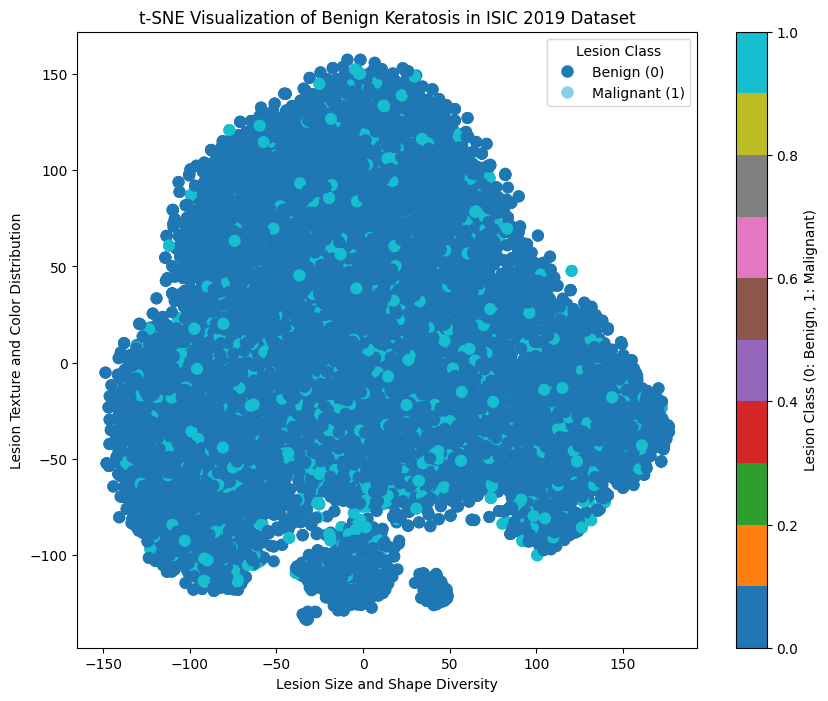

In [19]:
# Create a mapping for labels (assuming 'BKL' is a binary label)
labels = df['BKL'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with tab10 colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='tab10', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
benign_color = plt.get_cmap('tab10')(0)  # Get the color for benign (0) from tab10
malignant_color = 'skyblue'  # Get the color for malignant (1) from tab10

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Benign Keratosis in ISIC 2019 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()

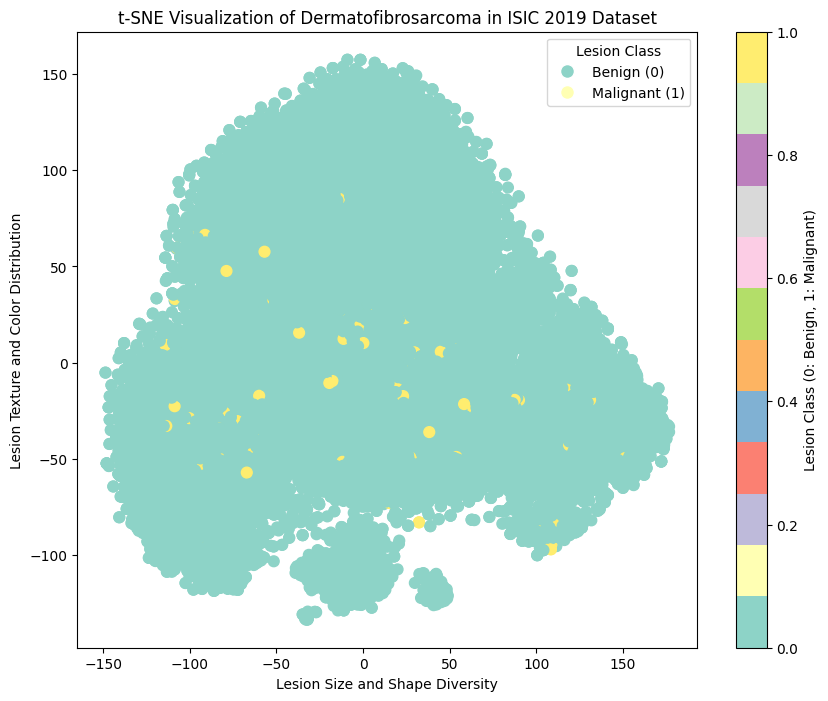

In [20]:
# Create a mapping for labels (assuming 'DF' is a binary label)
labels = df['DF'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with Set3 colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='Set3', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
benign_color = plt.get_cmap('Set3')(0)  # Get the color for benign (0) from Set3
malignant_color = plt.get_cmap('Set3')(1)  # Get the color for malignant (1) from Set3

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Dermatofibrosarcoma in ISIC 2019 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()

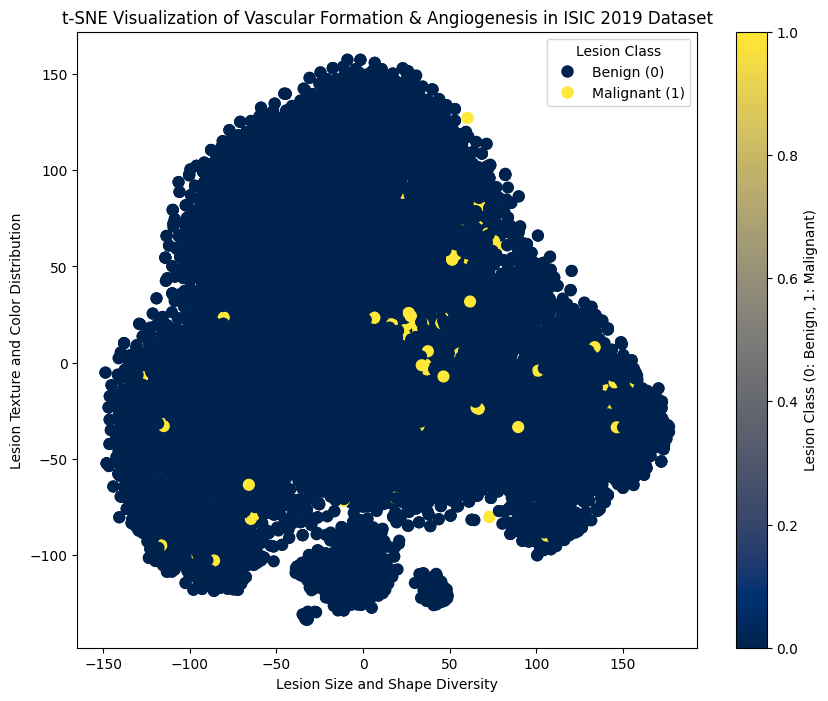

In [21]:
# Create a mapping for labels (assuming 'VASC' is a binary label)
labels = df['VASC'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with cividis colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='cividis', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
benign_color = plt.get_cmap('cividis')(0)  # Get the color for benign (0) from cividis
malignant_color = plt.get_cmap('cividis')(256)  # Get the color for malignant (1) from cividis

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Vascular Formation & Angiogenesis in ISIC 2019 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()

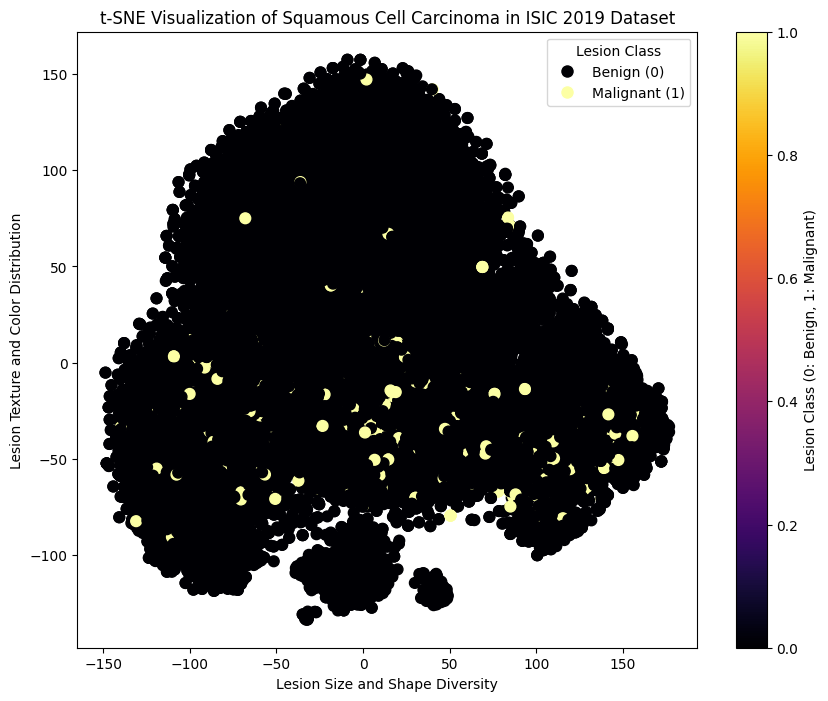

In [22]:
# Create a mapping for labels (assuming 'SCC' is a binary label)
labels = df['SCC'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with inferno colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='inferno', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
benign_color = plt.get_cmap('inferno')(0)  # Get the color for benign (0) from inferno
malignant_color = plt.get_cmap('inferno')(256)  # Get the color for malignant (1) from inferno

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Squamous Cell Carcinoma in ISIC 2019 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()

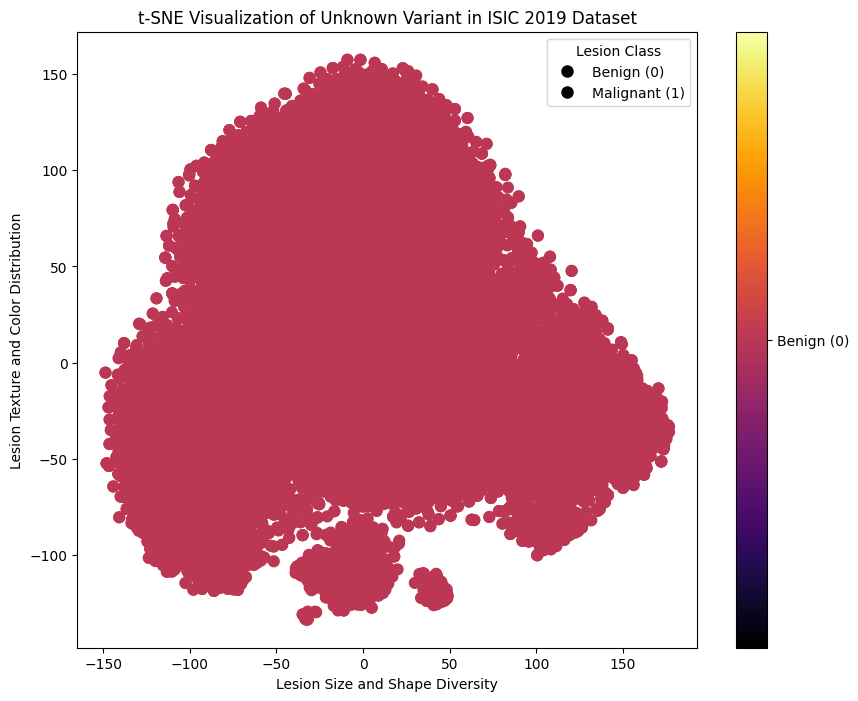

In [34]:
import matplotlib.pyplot as plt

# Create a mapping for labels (assuming 'UNK' is a binary label)
labels = df['UNK'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with inferno colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='inferno', s=60)

# Add colorbar for continuous scale visualization
colorbar = plt.colorbar(scatter, ticks=[0, 1])  # Set ticks for colorbar
colorbar.ax.set_yticklabels(['Benign (0)', 'Malignant (1)'])  # Label colorbar correctly

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
benign_color = plt.get_cmap('inferno')(0)  # Get the color for benign (0) from inferno
malignant_color = plt.get_cmap('inferno')(1)  # Get the color for malignant (1) from inferno

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Unknown Variant in ISIC 2019 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()

# Ham 1000

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

In [2]:
# Define the path to your dataset
train_dir = '/kaggle/input/ham1000-segmentation-and-classification/images'  # Replace with the actual path
label_file = '/kaggle/input/ham1000-segmentation-and-classification/GroundTruth.csv'  # Replace with the actual path

In [3]:
# Load the CSV file with labels
df = pd.read_csv(label_file)

In [4]:
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Ensure image filenames are correct
df['image'] = df['image'].str.strip()  # Remove any leading/trailing spaces
df['image'] = df['image'].apply(lambda x: x + '.jpg' if not x.endswith('.jpg') else x)  # Ensure .jpg extension

In [6]:
# Create a mapping for labels (assuming 'MEL' is a binary label)
labels = df['MEL'].tolist()

In [7]:
# Check if files exist and filter valid filenames
valid_files = df['image'].apply(lambda x: os.path.isfile(os.path.join(train_dir, x)))
df = df[valid_files]

In [8]:
# Load the pre-trained MobileNetV2 model without the top layers
local_weights_path = '/kaggle/input/mobilenet/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5'
model = MobileNetV2(weights=local_weights_path, include_top=False, pooling='avg', input_shape=(224, 224, 3))

In [9]:
# Set up ImageDataGenerator to load images in batches
datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Create a generator for the images
image_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_dir,
    x_col='image',
    class_mode=None,  # No labels needed for generator
    target_size=(224, 224),
    batch_size=32,
    shuffle=False  # Important for keeping the order
)

Found 10015 validated image filenames.


In [11]:
# Function to extract features using the model
def extract_features_with_batches(generator, model):
    features = model.predict(generator, verbose=1)
    return features

In [12]:
# Extract features using the generator
features = extract_features_with_batches(image_generator, model)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 247s 784ms/step


In [13]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
 # Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, n_iter=3000)
features_tsne = tsne.fit_transform(features_scaled)

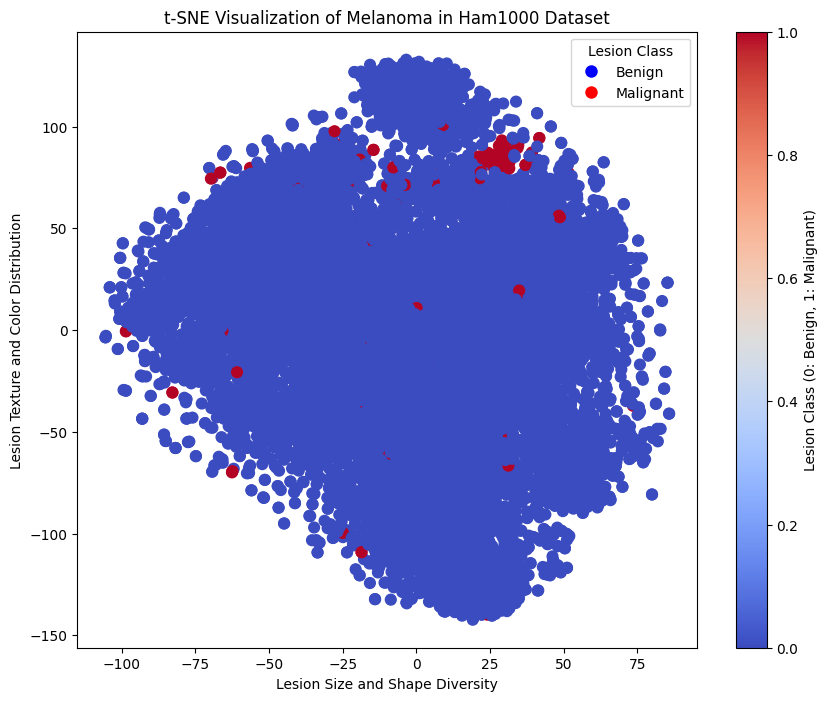

In [35]:
# Plot the t-SNE result with legend
plt.figure(figsize=(10, 8))

# Create scatter plot
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='coolwarm', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign', 'Malignant']
colors = ['blue', 'red']  # Corresponding to the class labels in the cmap

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=colors[0], markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=colors[1], markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Melanoma in Ham1000 Dataset")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()


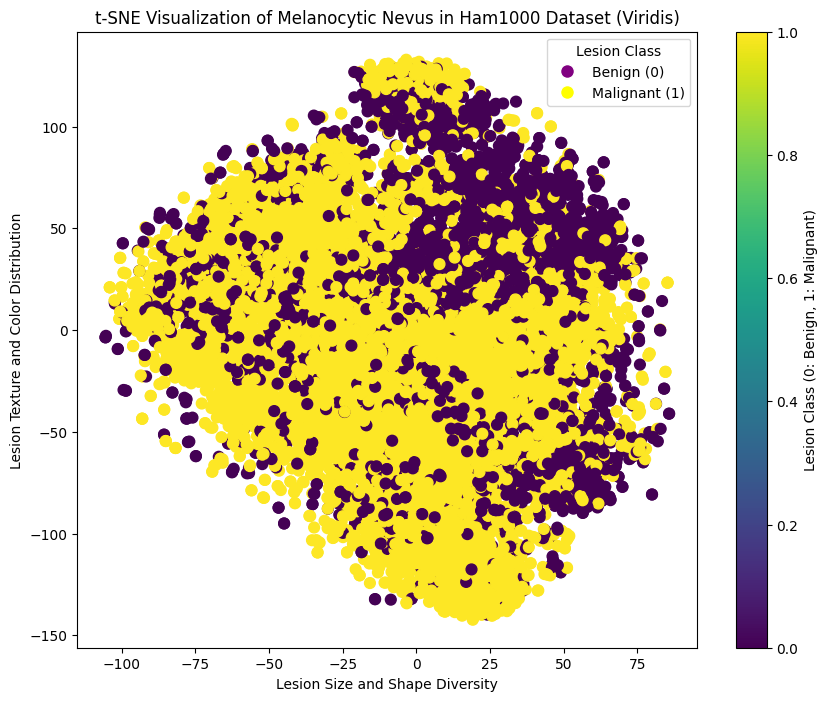

In [36]:
# Create a mapping for labels (assuming 'NV' is a binary label)
labels = df['NV'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result with viridis colormap and legend
plt.figure(figsize=(10, 8))

# Create scatter plot with viridis colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='viridis', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
colors = ['purple', 'yellow']  # Custom colors to match viridis, you can adjust

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=colors[0], markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=colors[1], markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Melanocytic Nevus in Ham1000 Dataset (Viridis)")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()


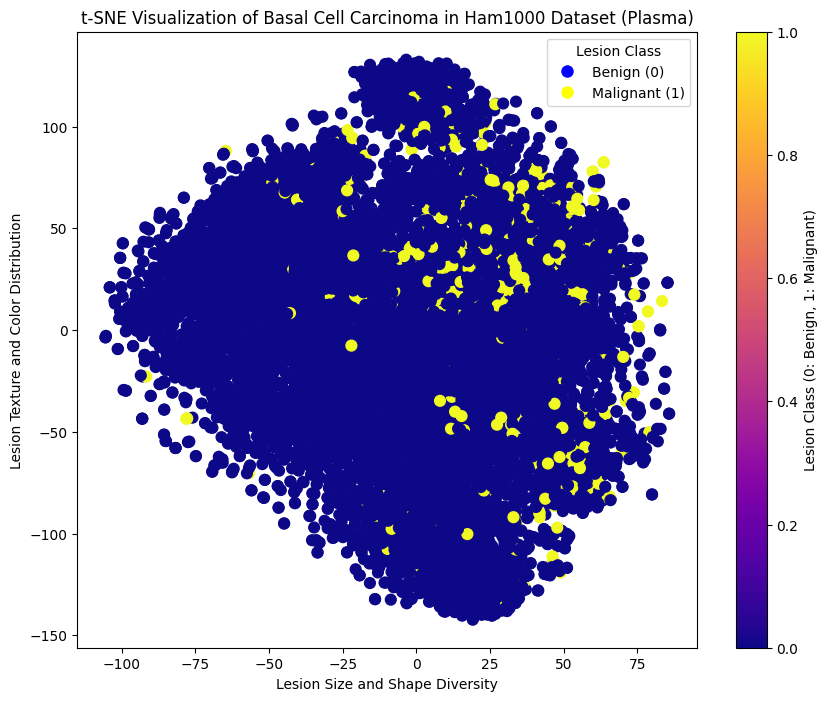

In [37]:
# Create a mapping for labels (assuming 'BCC' is a binary label)
labels = df['BCC'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result with plasma colormap and legend
plt.figure(figsize=(10, 8))

# Create scatter plot with plasma colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='plasma', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
colors = ['blue', 'yellow']  # Custom colors to match plasma, you can adjust

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=colors[0], markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=colors[1], markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Basal Cell Carcinoma in Ham1000 Dataset (Plasma)")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()


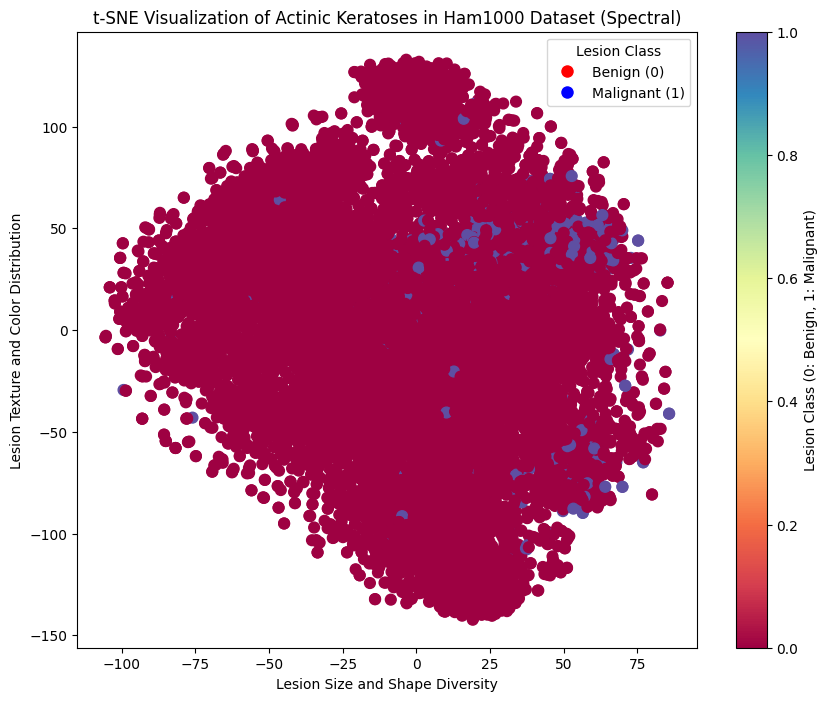

In [38]:
# Create a mapping for labels (assuming 'AKIEC' is a binary label)
labels = df['AKIEC'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result with Spectral colormap and legend
plt.figure(figsize=(10, 8))

# Create scatter plot with Spectral colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='Spectral', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
# Select representative colors from the Spectral colormap for 0 and 1
colors = ['red', 'blue']  # Spectral gradient is from blue to red

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=colors[0], markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=colors[1], markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Actinic Keratoses in Ham1000 Dataset (Spectral)")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()


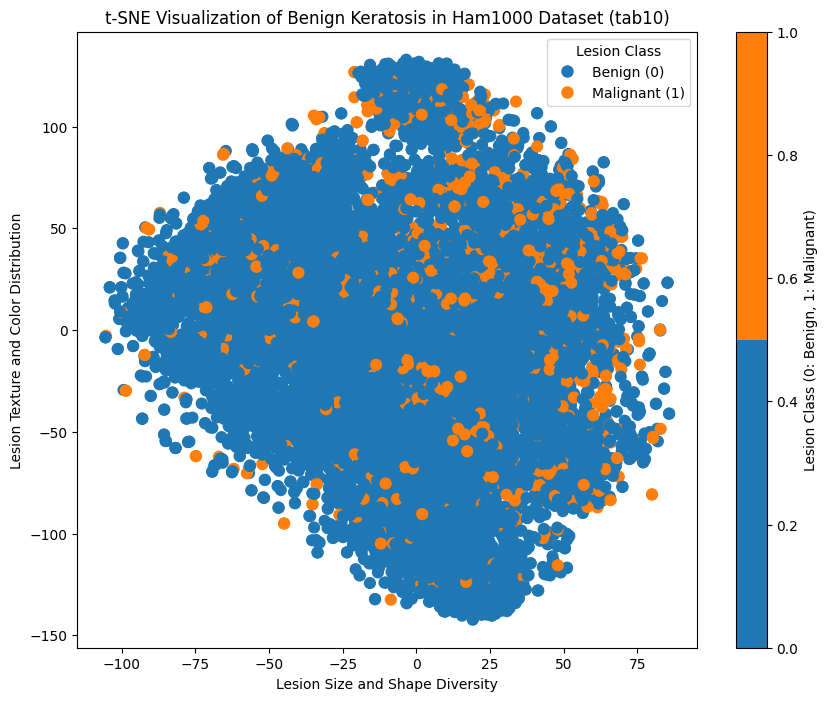

In [39]:
import matplotlib.colors as mcolors

# Create a mapping for labels (assuming 'BKL' is a binary label)
labels = df['BKL'].tolist()  # 0 for Benign, 1 for Malignant

# Extract 'skyblue' and 'red' from tab10 colormap
tab10_colors = plt.get_cmap('tab10').colors
benign_color = tab10_colors[0]  # Skyblue (first color in tab10)
malignant_color = tab10_colors[1]  # Red (second color in tab10)

# Plot the t-SNE result
plt.figure(figsize=(10, 8))

# Create scatter plot with manually selected 'tab10' colors
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, 
                      cmap=mcolors.ListedColormap([benign_color, malignant_color]), s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Benign Keratosis in Ham1000 Dataset (tab10)")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()


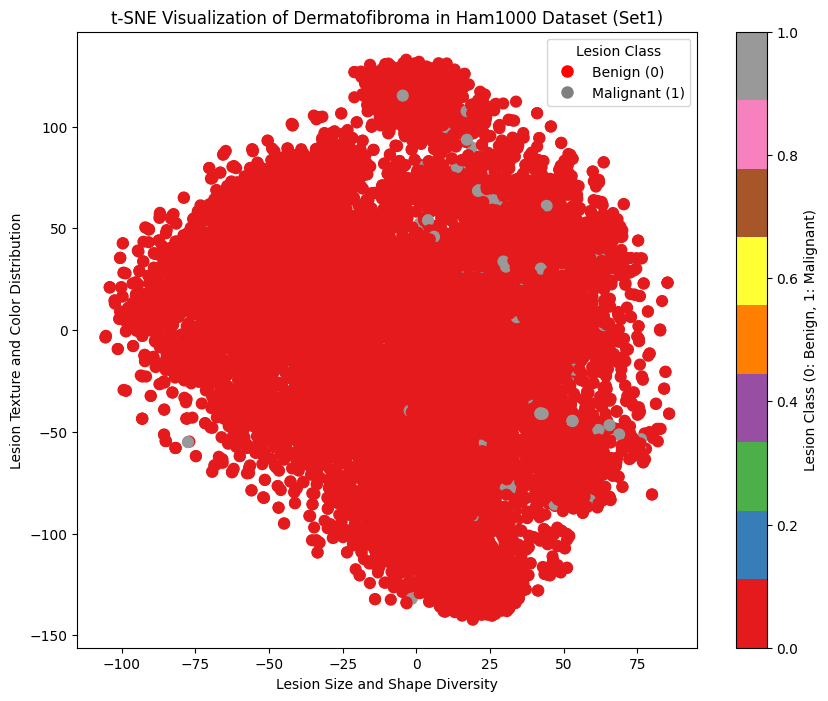

In [40]:
# Create a mapping for labels (assuming 'DF' is a binary label)
labels = df['DF'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result with Set1 colormap and legend
plt.figure(figsize=(10, 8))

# Create scatter plot with Set1 colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='Set1', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']
# Select representative colors from the Set1 colormap for 0 and 1
colors = ['red', 'grey']  # Custom chosen colors, you can adjust if needed

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=colors[0], markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=colors[1], markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Dermatofibroma in Ham1000 Dataset (Set1)")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()


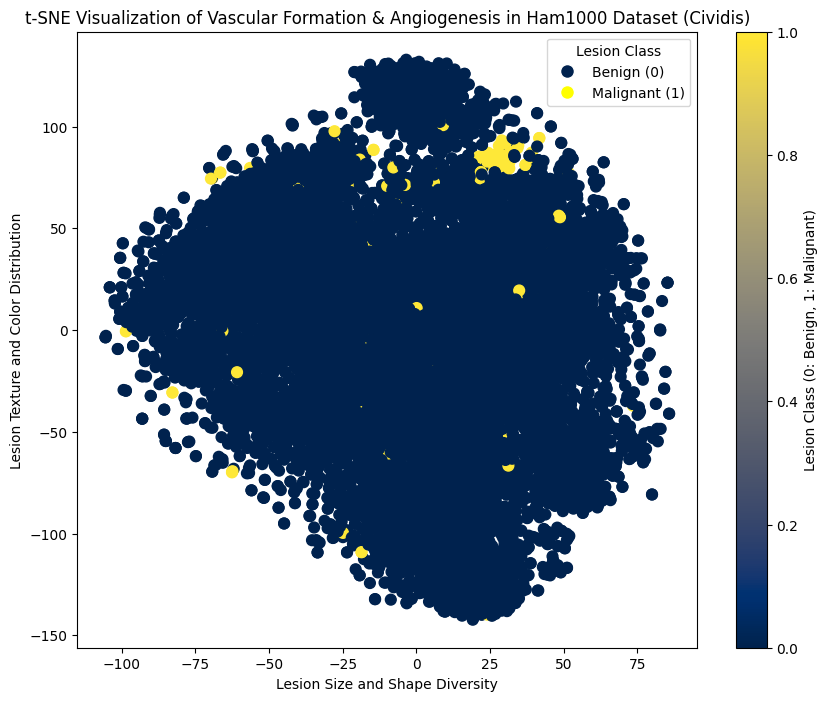

In [41]:
# Create a mapping for labels (assuming 'VASC' is a binary label)
labels = df['VASC'].tolist()  # 0 for Benign, 1 for Malignant

# Plot the t-SNE result with cividis colormap and legend
plt.figure(figsize=(10, 8))

# Create scatter plot with cividis colormap
scatter = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels, cmap='cividis', s=60)

# Add colorbar for continuous scale visualization
plt.colorbar(scatter, label='Lesion Class (0: Benign, 1: Malignant)')

# Create a custom legend for benign and malignant
legend_labels = ['Benign (0)', 'Malignant (1)']

# Get color from cividis for benign
cividis_cmap = plt.get_cmap('cividis')
benign_color = cividis_cmap(0)  # Color for benign (0)
malignant_color = 'yellow'  # Set malignant (1) color to yellow

# Create scatter points for legend
benign_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[0],
                          markerfacecolor=benign_color, markersize=10)
malignant_patch = plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[1],
                             markerfacecolor=malignant_color, markersize=10)

# Add the legend to the plot
plt.legend(handles=[benign_patch, malignant_patch], title="Lesion Class", loc='upper right')

# Add title and axis labels
plt.title("t-SNE Visualization of Vascular Formation & Angiogenesis in Ham1000 Dataset (Cividis)")
plt.xlabel("Lesion Size and Shape Diversity")
plt.ylabel("Lesion Texture and Color Distribution")

# Show the plot
plt.show()
